### Trabajo Final Master Ciencia de Datos y Business Analytics
## Reporte Laboratorio Seco - Análisis del Juego de Datos POS 2018

Actualización Agosto 30, 2023

### Introducción
El siguiente análisis de laboratorio seco se compone de:
    
    a. La revisión del juego de datos de POS 2018 para verificar integridad del mismo
    b. Limpieza del juego de datos y eliminación de columnas obsoletas
    c. Archivo del juego de datos limpio para análisis EDA

In [1]:
# Importar y leer archivo como DF Pandas
import pandas as pd
csv_file_path = 'data_raw/retail_ventas_2018_4327905.txt'
encoding = 'latin1'
df = pd.read_csv(csv_file_path, encoding=encoding)

/var/folders/9c/f5lf7vz91zs8mwbnjbtxzjgw0000gn/T/ipykernel_36091/3554589517.py:5: DtypeWarning: Columns (2,7,8,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file_path, encoding=encoding)


In [2]:
# Información del juego de datos
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4327905 entries, 0 to 4327904
Data columns (total 27 columns):
 #   Column                Dtype  
---  ------                -----  
 0   GRUPO                 int64  
 1   NO_CLIENTE            object 
 2   SUCURSAL              object 
 3   FECHA                 object 
 4   CODIGO_MARCA          float64
 5   NOMBRE_MODELO         object 
 6   COLOR                 object 
 7   TALLA                 object 
 8   UPC                   object 
 9   PRECIO_INV            float64
 10  PRECIO_VTA            float64
 11  CANTIDAD              int64  
 12  CODIGO_TEMP           object 
 13  CODIGO_COLOR          float64
 14  VALIDO                object 
 15  TASA_CAMBIO           float64
 16  USER_CREA             object 
 17  FECHA_CREA            object 
 18  EAN_COLOR             float64
 19  MODELO                object 
 20  TMP_ID                float64
 21  VENTAS                float64
 22  COSTO                 float64
 23  DEPT   

In [3]:
# revisar un registro en particular
first_row_vertically = df.head(1).transpose()
print(first_row_vertically)

                                             0
GRUPO                                       20
NO_CLIENTE                              02-072
SUCURSAL                                   NC2
FECHA                               01/31/2018
CODIGO_MARCA                             789.0
NOMBRE_MODELO                       905653-010
COLOR                                  BLK/WHT
TALLA                                      NaN
UPC                                        NaN
PRECIO_INV                                 0.0
PRECIO_VTA                                60.0
CANTIDAD                                     1
CODIGO_TEMP                               HO17
CODIGO_COLOR                               NaN
VALIDO                                       N
TASA_CAMBIO                                1.0
USER_CREA                             SACEVEDO
FECHA_CREA            10/07/2019 3:27:01 p. m.
EAN_COLOR                                  NaN
MODELO                              905653-010
TMP_ID       

In [4]:
# Eliminar columnas que no necesitamos
columns_to_drop = ['GRUPO', 'SUCURSAL', 'COLOR', 'TALLA', 'UPC', 'PRECIO_INV', 'PRECIO_VTA',
    'CODIGO_COLOR', 'VALIDO', 'TASA_CAMBIO', 'USER_CREA', 'FECHA_CREA',
    'EAN_COLOR', 'MODELO', 'TMP_ID', 'VENTAS', 'COSTO', 'DEPT', 'COSTO_CIF',
    'VENTAS_MONEDA_ORIGEN', 'TIPO_PRECIO']

df_cleaned = df.drop(columns=columns_to_drop, inplace=False)

In [5]:
# revisar un registro en particular
first_row_vertically = df_cleaned.head(1).transpose()
print(first_row_vertically)

                        0
NO_CLIENTE         02-072
FECHA          01/31/2018
CODIGO_MARCA        789.0
NOMBRE_MODELO  905653-010
CANTIDAD                1
CODIGO_TEMP          HO17


In [6]:
# Convert the "FECHA" column to datetime data type
df_cleaned['FECHA'] = pd.to_datetime(df_cleaned['FECHA'], format='%m/%d/%Y')


In [7]:
# Revisar un registro en particular para asegurarse que el tipo de fecha mejoró
first_row_vertically = df_cleaned.head(1).transpose()
print(first_row_vertically)

                                 0
NO_CLIENTE                  02-072
FECHA          2018-01-31 00:00:00
CODIGO_MARCA                 789.0
NOMBRE_MODELO           905653-010
CANTIDAD                         1
CODIGO_TEMP                   HO17


In [8]:
# Extraer la variable 'WEEK_OF_YEAR' de la columna 'FECHA'
df_cleaned['WEEK_OF_YEAR'] = df_cleaned['FECHA'].dt.strftime('%Y-%U')

# Agrupar la data por 'NO_CLIENTE', 'CODIGO_MARCA', y la semana del año
grouped = df_cleaned.groupby(['NO_CLIENTE', 'CODIGO_MARCA', 'WEEK_OF_YEAR'])['CANTIDAD'].sum().reset_index()


## Pruebas de Integridad de los datos
El siguiente es un juego de pruebas sencillo para verificar la integridad de los datos limpios y su uso en el entrenamiento de datos. 

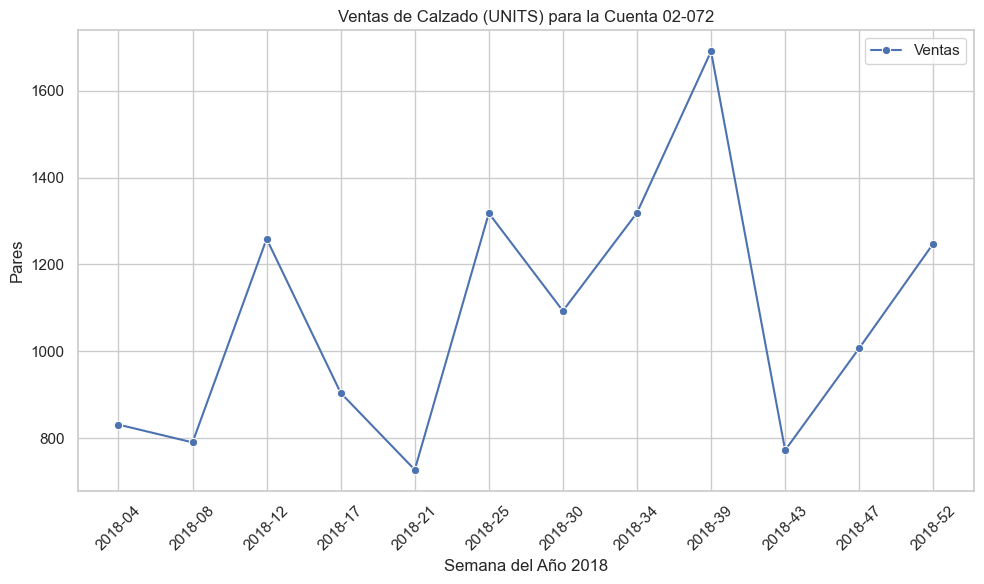

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos para el análisis cliente 02-072
data_temp = grouped[(grouped['NO_CLIENTE'] == '02-072') & (grouped['CODIGO_MARCA'] == 456)].sort_values(by='WEEK_OF_YEAR', ascending=True)
data_temp = data_temp[['WEEK_OF_YEAR', 'CANTIDAD']].sort_values(by='WEEK_OF_YEAR', ascending=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='WEEK_OF_YEAR', y='CANTIDAD', data=data_temp, marker='o', label='Ventas')
plt.title('Ventas de Calzado (UNITS) para la Cuenta 02-072')
plt.xlabel('Semana del Año 2018')
plt.ylabel('Pares')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend()  # Add a legend to label the line

plt.show()


In [11]:
print(data_temp)

   WEEK_OF_YEAR  CANTIDAD
0       2018-04       831
1       2018-08       790
2       2018-12      1259
3       2018-17       904
4       2018-21       727
5       2018-25      1318
6       2018-30      1093
7       2018-34      1319
8       2018-39      1691
9       2018-43       772
10      2018-47      1007
11      2018-52      1248


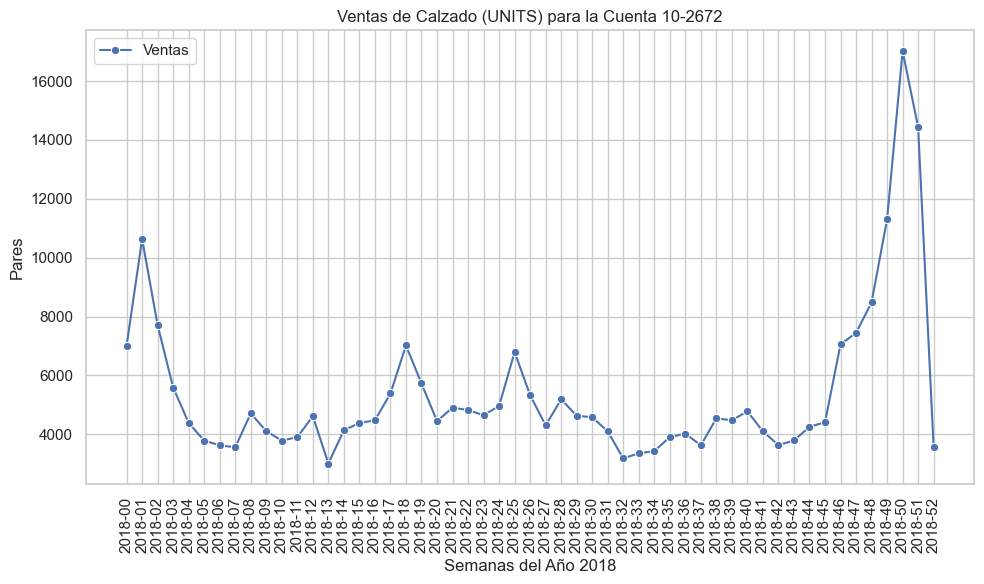

In [12]:
# Filtrar datos para el análisis cliente 10-2672 Sportline Colombia
data_temp = grouped[(grouped['NO_CLIENTE'] == '10-2672') & (grouped['CODIGO_MARCA'] == 456)].sort_values(by='WEEK_OF_YEAR', ascending=True)
data_temp = data_temp[['WEEK_OF_YEAR', 'CANTIDAD']].sort_values(by='WEEK_OF_YEAR', ascending=True)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='WEEK_OF_YEAR', y='CANTIDAD', data=data_temp, marker='o', label='Ventas')
plt.title('Ventas de Calzado (UNITS) para la Cuenta 10-2672')
plt.xlabel('Semanas del Año 2018')
plt.ylabel('Pares')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()  # Add a legend to label the line

plt.show()


## Conclusión
El archivo se encuentra en estado SANO. Algunas cuentas - como la cuenta de prueba 02-072 - solo ingresó los datos como acumulados del mes, cada cuatro semanas, pero las cuentas de prueba de Sportline - como la 10-2672 Sportline Colombia - ingresó los datos por semanas, óptimos para el entrenamiento de los mismos. 

In [13]:
csv_file_path = "data_clean/2018_POS_clean.csv"
df_cleaned.to_csv(csv_file_path, index=False)